In [1]:
from matplotlib import rc
from lmfit import Model
rc('text', usetex=False)
rc("font", family="serif")
import numpy as np #notwendige Pakete laden
import matplotlib.pyplot as plt
import matplotlib
import math
import matplotlib.ticker as ticker
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator, NullLocator, IndexLocator, FixedLocator, NullFormatter)
import pandas as pd
from PIL import Image


In [2]:
matplotlib.use("pgf")
plt.rcParams.update({
    "font.family": "serif",
    "text.usetex": True,
    "pgf.rcfonts": False,
    "figure.figsize": (6.48, 2.75),
    "pgf.texsystem": "pdflatex",
    "font.size": 13,
    "text.latex.preamble" :  r"\usepackage{amsmath} \usepackage[utf8]{inputenc} \usepackage[T1]{fontenc} \usepackage[output-decimal-marker={,},print-unity-mantissa=false]{siunitx} \sisetup{per-mode=fraction, separate-uncertainty = true, locale = DE} \usepackage[acronym, toc, section=section, nonumberlist, nopostdot]{glossaries-extra}",
    "pgf.preamble": r"\usepackage{amsmath} \usepackage[utf8]{inputenc} \usepackage[T1]{fontenc} \usepackage[output-decimal-marker={,},print-unity-mantissa=false]{siunitx} \sisetup{per-mode=fraction, separate-uncertainty = true, locale = DE} \usepackage[acronym, toc, section=section, nonumberlist, nopostdot]{glossaries-extra}",
    #r"\usepackage[acronym, toc, section=section, nonumberlist, nopostdot]{glossaries-extra}"])
})

In [3]:
import matplotlib.ticker

class OOMFormatter(matplotlib.ticker.ScalarFormatter):
    def __init__(self, order=0, fformat="%1.1f", offset=True, mathText=True):
        self.oom = order
        self.fformat = fformat
        matplotlib.ticker.ScalarFormatter.__init__(self,useOffset=offset,useMathText=mathText)
    def _set_order_of_magnitude(self):
        self.orderOfMagnitude = self.oom
    def _set_format(self):
        self.format = self.fformat
        if self._useMathText:
            self.format = ('\\num{%s}' % self.format)
    

In [4]:
import os
from matplotlib.patches import Ellipse
import skimage.transform

In [5]:
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator, NullLocator, LogLocator,FormatStrFormatter, FuncFormatter)

In [6]:
from skimage.io import imread

In [7]:
import lmfit
from lmfit.models import GaussianModel, LinearModel

In [8]:
data_path = '220501_pictures/scattering/'
plots_output_path = 'plots_output/'

# Resonance

In [9]:
from mpl_toolkits.axes_grid1 import ImageGrid

In [10]:
lognorm = matplotlib.colors.LogNorm(1,1000)

In [11]:
cmap = matplotlib.cm.get_cmap('plasma').copy()


In [12]:
prop = dict(arrowstyle="-|>,head_width=0.2,head_length=0.8",
            shrinkA=0,shrinkB=0, fc='green', ec='green', color='green')

## Show pedestals and raw pictures

Axes(0.125,0.125;0.775x0.755)



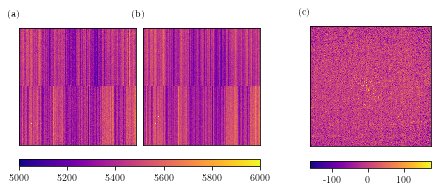

In [50]:
%matplotlib inline
#grob
fig = plt.figure(figsize=(6.48,5.5))
(subfig_l, subfig_r) = fig.subfigures(nrows=1, ncols=2, width_ratios=(2,1), wspace=0, hspace=0.2)
grid = ImageGrid(subfig_l, 111,          # as in plt.subplot(111)
                 nrows_ncols=(1,2),
                 axes_pad=0.1,
                 share_all=True,
                 cbar_location="bottom",
                 cbar_mode="single",
                 cbar_size=0.1,
                 #cbar_pad=0.15,
                 )
grid2 = ImageGrid(subfig_r, 111,          # as in plt.subplot(111)
                 nrows_ncols=(1,1),
                 axes_pad=(0.0,0.1),
                 share_all=True,
                 cbar_location="bottom",
                 cbar_mode="single",
                 cbar_size=0.1,
                 #cbar_pad=0.15,
                 )
print(grid[0])
imgs = []
lognorm_raw = matplotlib.colors.SymLogNorm(vmin=-250,vmax=250, linthresh=1.)
#lognorm_raw =  matplotlib.colors.Normalize(vmin=5e3,vmax=6e5)
norm = matplotlib.colors.Normalize(5e3, 6e3)
image = imread(data_path + 'capture_without_pedestal_substraction/image_sum_1.tiff')
image = image[80:320, 80:320]
graph = image.astype(np.float64)
graph[image == 0] = np.nan
imgs.append(graph)

image = imread(data_path + 'peds/ped_0.tiff')
image = image[80:320, 80:320]
graph = image.astype(np.float64)
graph[image == 0] = np.nan
imgs.append(graph)

image = imread(data_path + 'no_filter_resonance/070322_no_filter_sum_1.tiff')
image = image[80:320, 80:320]
graph = image.astype(np.float64)
#graph[image == 0] = np.nan
imgs.append(graph)

letters = ['(a)', '(b)', '(c)']
ims = []
c = 0 
for axis, img, letter in zip(grid, imgs, letters):
    #axis.axis('off')
    axis.set_xticks([]) 
    axis.set_yticks([])
    axis.text(-0.1, 1.1, letter, transform=axis.transAxes,)
    im = axis.pcolormesh(img, cmap=cmap, norm=norm,rasterized=True)
    #fig.colorbar(ims[c], orientation='horizontal', ax=axis, fraction=0.043, pad=0.04,)
    axis.cax.colorbar(im,  format=FuncFormatter(lambda x, pos: r"%d" % x if x != 1 else "1"))

axis = grid2[0]
axis.set_xticks([]) 
axis.set_yticks([])
axis.text(-0.1, 1.1, letters[2], transform=axis.transAxes,)
im = axis.pcolormesh(imgs[2], cmap=cmap, norm=None,rasterized=True)
#fig.colorbar(ims[c], orientation='horizontal', ax=axis, fraction=0.043, pad=0.04,)
axis.cax.colorbar(im,  format=FuncFormatter(lambda x, pos: r"%d" % x if x != 1 else "1"))


#axis.annotate("center of transfomration", (30,99),(150, 10),arrowprops=prop)
print()
# for im in ims:
#     cb = axis.cax.colorbar(im,  format=FuncFormatter(lambda x, pos: r"%d" % x if x != 1 else "1"))
#     # cb = f.colorbar(im, orientation='vertical', ax=axs[2], fraction=0.043, pad=0.04,)
# ticklabs = cb.ax.get_yticklabels()
# for t in ticklabs:
#     t.set_verticalalignment('center')

#fig.tight_layout()


In [51]:
fig.savefig(plots_output_path + 'capture_ped_diff.pgf',bbox_inches='tight', pad_inches=0, dpi=500)

In [1]:
print(1 + np.nan)

nan


## Thresholding

C:\Users\lunin\AppData\Local\Temp/ipykernel_19508/279324862.py:65: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


[1284646917.0, 3168569.0, 1476815.0, 543377.0, 225186.0, 148889.0]


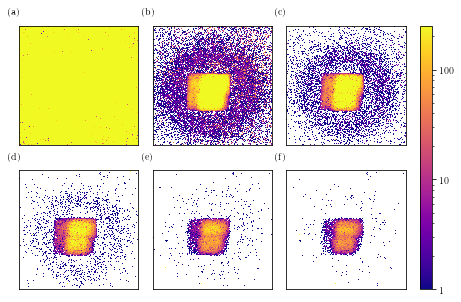

In [16]:
%matplotlib inline
#grob

fig = plt.figure(figsize=(6.48,7.5))
# fig.suptitle('Gd M5 scattering, no filter')
grid = ImageGrid(fig, 111,          # as in plt.subplot(111)
                 nrows_ncols=(2,3),
                 axes_pad=(0.2, 0.35),
                 share_all=True,
                 cbar_location="right",
                 cbar_mode="single",
                 cbar_size="5%",
                 #cbar_pad=0.15,
                 )
imgs = []
image = imread(data_path + 'th_0_resonance/single_count_mask_only_th_0_sum_50000.tiff')
image = image[80:320, 80:320]
graph = image.astype(np.float64)
#graph[image == 0] = np.nan
imgs.append(graph)

image = imread(data_path + 'th_100_resonance/single_count_mask_only_th_100_sum_50000.tiff')
image = image[80:320, 80:320]
graph = image.astype(np.float64)
#graph[image == 0] = np.nan
imgs.append(graph)

image = imread(data_path + 'th_125_resonance/single_count_mask_only_th_125_sum_50000.tiff')
image = image[80:320, 80:320]
graph = image.astype(np.float64)
#graph[image == 0] = np.nan
imgs.append(graph)

image = imread(data_path + 'th_150_resonance/single_count_mask_only_th_150_sum_50000.tiff')
image = image[80:320, 80:320]
graph = image.astype(np.float64)
#graph[image == 0] = np.nan
imgs.append(graph)

image = imread(data_path + 'th_170_resonance/single_count_mask_only_th_170_sum_50000.tiff')
image = image[80:320, 80:320]
graph = image.astype(np.float64)
#graph[image == 0] = np.nan
imgs.append(graph)

image = imread(data_path + 'th_180_resonance/single_count_mask_only_th_180_sum_50000.tiff')
image = image[80:320, 80:320]
graph = image.astype(np.float64)
#graph[image == 0] = np.nan
imgs.append(graph)

letters = ['(a)', '(b)', '(c)', '(d)', '(e)', '(f)']

for axis, img, letter in zip(grid, imgs, letters):
    #axis.axis('off')
    axis.set_xticks([]) 
    axis.set_yticks([])
    axis.text(-0.1, 1.1, letter, transform=axis.transAxes,)
    im = axis.pcolormesh(img, cmap=cmap, norm=lognorm,rasterized=True )

#axis.annotate("center of transfomration", (30,99),(150, 10),arrowprops=prop)
cb = axis.cax.colorbar(im,  format=FuncFormatter(lambda x, pos: r"%d" % x if x != 1 else "1"))
    # cb = f.colorbar(im, orientation='vertical', ax=axs[2], fraction=0.043, pad=0.04,)

fig.tight_layout()
print(list(map(lambda x: x.sum(axis=(0,1)), imgs)))

In [13]:
fig.savefig(plots_output_path + 'th_0_100_125_150_170_180.pgf',bbox_inches='tight', pad_inches=0, dpi=500)

C:\Users\lunin\AppData\Local\Temp/ipykernel_12220/4068195538.py:87: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


[48858994.0, 3168569.0, 1476815.0, 543377.0, 225186.0, 148889.0, 76076.0, 41736.0, 10716.0]
(240, 240)


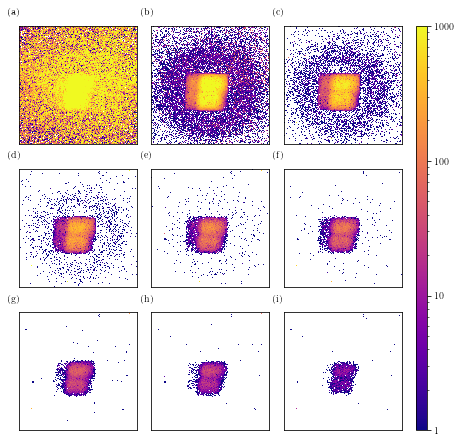

In [22]:
%matplotlib inline
#grob

fig = plt.figure(figsize=(6.48,7.5))
# fig.suptitle('Gd M5 scattering, no filter')
grid = ImageGrid(fig, 111,          # as in plt.subplot(111)
                 nrows_ncols=(3,3),
                 axes_pad=(0.2, 0.35),
                 share_all=True,
                 cbar_location="right",
                 cbar_mode="single",
                 cbar_size="3%",
                 #cbar_pad=0.15,
                 )
imgs = []
image = imread(data_path + 'th_50_resonance/single_count_mask_only_th_50_sum_50000.tiff')
image = image[80:320, 80:320]
graph = image.astype(np.float64)
#graph[image == 0] = np.nan
imgs.append(graph)

image = imread(data_path + 'th_100_resonance/single_count_mask_only_th_100_sum_50000.tiff')
image = image[80:320, 80:320]
graph = image.astype(np.float64)
#graph[image == 0] = np.nan
imgs.append(graph)

image = imread(data_path + 'th_125_resonance/single_count_mask_only_th_125_sum_50000.tiff')
image = image[80:320, 80:320]
graph = image.astype(np.float64)
#graph[image == 0] = np.nan
imgs.append(graph)

image = imread(data_path + 'th_150_resonance/single_count_mask_only_th_150_sum_50000.tiff')
image = image[80:320, 80:320]
graph = image.astype(np.float64)
#graph[image == 0] = np.nan
imgs.append(graph)

image = imread(data_path + 'th_170_resonance/single_count_mask_only_th_170_sum_50000.tiff')
image = image[80:320, 80:320]
graph = image.astype(np.float64)
#graph[image == 0] = np.nan
imgs.append(graph)

image = imread(data_path + 'th_180_resonance/single_count_mask_only_th_180_sum_50000.tiff')
image = image[80:320, 80:320]
graph = image.astype(np.float64)
#graph[image == 0] = np.nan
imgs.append(graph)

image = imread(data_path + 'th_other_resonance/single_count_mask_only_th_200_sum_50000.tiff')
image = image[80:320, 80:320]
graph = image.astype(np.float64)
#graph[image == 0] = np.nan
imgs.append(graph)

image = imread(data_path + 'th_other_resonance/single_count_mask_only_th_220_sum_50000.tiff')
image = image[80:320, 80:320]
graph = image.astype(np.float64)
#graph[image == 0] = np.nan
imgs.append(graph)

image = imread(data_path + 'th_other_resonance/single_count_mask_only_th_260_sum_50000.tiff')
image = image[80:320, 80:320]
graph = image.astype(np.float64)
#graph[image == 0] = np.nan
imgs.append(graph)





letters = ['(a)', '(b)', '(c)', '(d)', '(e)', '(f)', '(g)', '(h)', '(i)']

for axis, img, letter in zip(grid, imgs, letters):
    #axis.axis('off')
    axis.set_xticks([]) 
    axis.set_yticks([])
    axis.text(-0.1, 1.1, letter, transform=axis.transAxes,)
    im = axis.pcolormesh(img, cmap=cmap, norm=lognorm,rasterized=True )

#axis.annotate("center of transfomration", (30,99),(150, 10),arrowprops=prop)
cb = axis.cax.colorbar(im,  format=FuncFormatter(lambda x, pos: r"%d" % x if x != 1 else "1"))
    # cb = f.colorbar(im, orientation='vertical', ax=axs[2], fraction=0.043, pad=0.04,)

fig.tight_layout()
print(list(map(lambda x: x.sum(axis=(0,1)), imgs)))
print(imgs[0].shape)

In [49]:
fig.savefig(plots_output_path + 'th_50_100_125_150_170_180_200_220_260.pgf',bbox_inches='tight', pad_inches=0, dpi=500)

### SNR

In [23]:
rr, cc = skimage.draw.ellipse(106,115, 100, 110)
ellipse_mask = np.zeros([240,240], dtype=np.uint8)
ellipse_mask[rr, cc] = 1

direct_mask = np.ones([240,240], dtype=np.uint8)
direct_mask[68:148,68:152] = 0
direct_mask[91:152,150:156] = 0

mask_signal = ellipse_mask*direct_mask
mask_noise = np.logical_not(ellipse_mask)*direct_mask



def avg_signal(img):
    signal_only = img*mask_signal
    nonzero_px = np.count_nonzero(signal_only)
    avg_signal_value = signal_only.sum(axis=(0,1))/mask_signal.sum(axis=(0,1))
    return avg_signal_value

def avg_noise(img):
    noise_only = img*mask_noise
    nonzero_px = np.count_nonzero(noise_only)
    avg_noise_value = noise_only.sum(axis=(0,1))/mask_noise.sum(axis=(0,1))
    return avg_noise_value

In [24]:
ths = [50, 100, 125, 150, 170, 180, 200, 220, 260]

imgs = []
image = imread(data_path + 'th_50_resonance/single_count_mask_only_th_50_sum_50000.tiff')
image = image[80:320, 80:320]
graph = image.astype(np.float64)
#graph[image == 0] = np.nan
imgs.append(graph)

image = imread(data_path + 'th_100_resonance/single_count_mask_only_th_100_sum_50000.tiff')
image = image[80:320, 80:320]
graph = image.astype(np.float64)
#graph[image == 0] = np.nan
imgs.append(graph)

image = imread(data_path + 'th_125_resonance/single_count_mask_only_th_125_sum_50000.tiff')
image = image[80:320, 80:320]
graph = image.astype(np.float64)
#graph[image == 0] = np.nan
imgs.append(graph)

image = imread(data_path + 'th_150_resonance/single_count_mask_only_th_150_sum_50000.tiff')
image = image[80:320, 80:320]
graph = image.astype(np.float64)
#graph[image == 0] = np.nan
imgs.append(graph)

image = imread(data_path + 'th_170_resonance/single_count_mask_only_th_170_sum_50000.tiff')
image = image[80:320, 80:320]
graph = image.astype(np.float64)
#graph[image == 0] = np.nan
imgs.append(graph)

image = imread(data_path + 'th_180_resonance/single_count_mask_only_th_180_sum_50000.tiff')
image = image[80:320, 80:320]
graph = image.astype(np.float64)
#graph[image == 0] = np.nan
imgs.append(graph)

image = imread(data_path + 'th_other_resonance/single_count_mask_only_th_200_sum_50000.tiff')
image = image[80:320, 80:320]
graph = image.astype(np.float64)
#graph[image == 0] = np.nan
imgs.append(graph)

image = imread(data_path + 'th_other_resonance/single_count_mask_only_th_220_sum_50000.tiff')
image = image[80:320, 80:320]
graph = image.astype(np.float64)
#graph[image == 0] = np.nan
imgs.append(graph)

image = imread(data_path + 'th_other_resonance/single_count_mask_only_th_260_sum_50000.tiff')
image = image[80:320, 80:320]
graph = image.astype(np.float64)
#graph[image == 0] = np.nan
imgs.append(graph)

imgs_snr = []
for img in imgs:
    snr = avg_signal(img)/avg_noise(img)
    imgs_snr.append(10*np.log(snr))

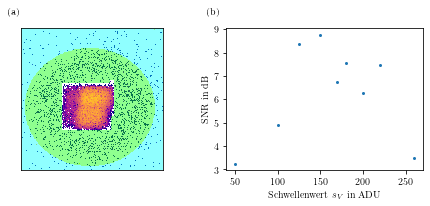

In [67]:
%matplotlib inline
#grob

# fig.suptitle('Gd M5 scattering, no filter')
fi, axes =  plt.subplots(1,2,figsize=(6.48, 3.0))

image = imread(data_path + 'th_150_resonance/single_count_mask_only_th_150_sum_50000.tiff')
image = image[80:320, 80:320]
stray = image.astype(np.float64)
#graph[image == 0] = np.nan

letters = ['(a)', '(b)', '(c)', '(d)', '(e)', '(f)']

for axis, letter in zip(axes, letters):
    axis.text(-0.1, 1.1, letter, transform=axis.transAxes,)
axis = axes[0]
axis.pcolormesh(stray, cmap=cmap, norm=lognorm,rasterized=True)
axis.pcolormesh(mask_noise, rasterized=True, cmap = matplotlib.colors.ListedColormap(['#FFFFFF00', '#00FFFF70']))
axis.pcolormesh(mask_signal, rasterized=True, cmap = matplotlib.colors.ListedColormap(['#FFFFFF00', '#00FF0070']))
axis.set_xticks([]) 
axis.set_yticks([])
axis.set_aspect(1.)
    
axis = axes[1]
axis.errorbar(ths, imgs_snr, fmt='o', markersize=2,)
axis.set_xlabel('Schwellenwert $s_V$ in ADU')
axis.set_ylabel('SNR in dB')

fi.tight_layout()
#print(list(map(lambda x: x.sum(axis=(0,1)), imgs)))

In [68]:
fi.savefig(plots_output_path + 'th_150_mask_snr.pgf',bbox_inches='tight', pad_inches=0, dpi=500)

C:\Users\lunin\AppData\Local\Temp/ipykernel_19508/2817734677.py:65: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


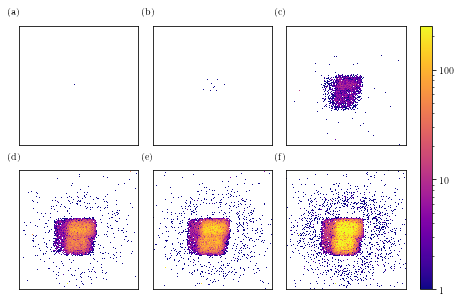

In [41]:
%matplotlib inline
#grob

fig = plt.figure(figsize=(6.48,7.5))
# fig.suptitle('Gd M5 scattering, no filter')
grid = ImageGrid(fig, 111,          # as in plt.subplot(111)
                 nrows_ncols=(2,3),
                 axes_pad=(0.2, 0.35),
                 share_all=True,
                 cbar_location="right",
                 cbar_mode="single",
                 cbar_size="5%",
                 #cbar_pad=0.15,
                 )
imgs = []
image = imread(data_path + 'th_150_resonance/single_count_mask_only_th_150_sum_1.tiff')
image = image[80:320, 80:320]
graph = image.astype(np.float64)
#graph[image == 0] = np.nan
imgs.append(graph)

image = imread(data_path + 'th_150_resonance/single_count_mask_only_th_150_sum_5.tiff')
image = image[80:320, 80:320]
graph = image.astype(np.float64)
#graph[image == 0] = np.nan
imgs.append(graph)

image = imread(data_path + 'th_150_resonance/single_count_mask_only_th_150_sum_1000.tiff')
image = image[80:320, 80:320]
graph = image.astype(np.float64)
#graph[image == 0] = np.nan
imgs.append(graph)

image = imread(data_path + 'th_150_resonance/single_count_mask_only_th_150_sum_10000.tiff')
image = image[80:320, 80:320]
graph = image.astype(np.float64)
#graph[image == 0] = np.nan
imgs.append(graph)

image = imread(data_path + 'th_150_resonance/single_count_mask_only_th_150_sum_20000.tiff')
image = image[80:320, 80:320]
graph = image.astype(np.float64)
#graph[image == 0] = np.nan
imgs.append(graph)

image = imread(data_path + 'th_150_resonance/single_count_mask_only_th_150_sum_50000.tiff')
image = image[80:320, 80:320]
graph = image.astype(np.float64)
#graph[image == 0] = np.nan
imgs.append(graph)

letters = ['(a)', '(b)', '(c)', '(d)', '(e)', '(f)']

for axis, img, letter in zip(grid, imgs, letters):
    #axis.axis('off')
    axis.set_xticks([]) 
    axis.set_yticks([])
    axis.text(-0.1, 1.1, letter, transform=axis.transAxes,)
    im = axis.pcolormesh(img, cmap=cmap, norm=lognorm,rasterized=True )

#axis.annotate("center of transfomration", (30,99),(150, 10),arrowprops=prop)
cb = axis.cax.colorbar(im,  format=FuncFormatter(lambda x, pos: r"%d" % x if x != 1 else "1"))
    # cb = f.colorbar(im, orientation='vertical', ax=axs[2], fraction=0.043, pad=0.04,)

fig.tight_layout()
frames =  [1, 5, 1000, 10000, 20000, 50000]
photons = list(map(lambda x: x.sum(axis=(0,1)), imgs))

In [58]:
fig.savefig(plots_output_path + 'th_150_sums.pgf',bbox_inches='tight', pad_inches=0, dpi=500)

<IPython.core.display.Javascript object>


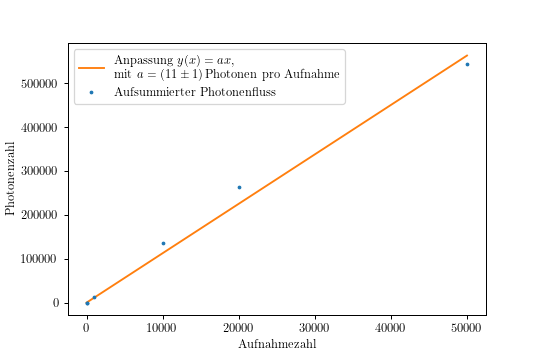

[[Model]]
    Model(linear)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 4
    # data points      = 6
    # variables        = 1
    chi-square         = 2.4859e+09
    reduced chi-square = 4.9719e+08
    Akaike info crit   = 121.052963
    Bayesian info crit = 120.844723
[[Variables]]
    slope:      11.2742059 +/- 0.40703152 (3.61%) (init = 1)
    intercept:  0 (fixed)


In [37]:
%matplotlib notebook
axis = plt.gca()
axis.errorbar(frames, photons, fmt='o', markersize=2, label='Aufsummierter Photonenfluss')

mod = LinearModel()
params = mod.make_params()
params.add('intercept', value=0,vary=False)
res = mod.fit(data=photons, params=params, x=frames)
axis.plot(frames, res.best_fit, label = 'Anpassung $y(x)=ax$,\nmit $a = \\SI{11(1)}{Photonen\ pro\ Aufnahme}$')
print(res.fit_report())
axis.set_xlabel('Aufnahmezahl')
axis.set_ylabel('Photonenzahl')
axis.legend()

In [ ]:
%matplotlib inline
#grob

fig = plt.figure(figsize=(6.48,5.5))
# fig.suptitle('Gd M5 scattering, no filter')
grid = ImageGrid(fig, 111,          # as in plt.subplot(111)
                 nrows_ncols=(1,3),
                 axes_pad=(0.1, 0.25),
                 share_all=True,
                 cbar_location="right",
                 cbar_mode="single",
                 cbar_size="7%",
                 #cbar_pad=0.15,
                 )
imgs = []

image = imread(data_path + 'th_150_resonance/single_count_mask_only_th_150_sum_50000.tiff')
image = image[80:320, 80:320]
graph = image.astype(np.float64)
graph[image == 0] = np.nan
imgs.append(graph)

image = imread(data_path + 'th_170_resonance/single_count_mask_only_th_170_sum_50000.tiff')
image = image[80:320, 80:320]
graph = image.astype(np.float64)
graph[image == 0] = np.nan
imgs.append(graph)

image = imread(data_path + 'th_180_resonance/single_count_mask_only_th_180_sum_50000.tiff')
image = image[80:320, 80:320]
graph = image.astype(np.float64)
graph[image == 0] = np.nan
imgs.append(graph)

letters = ['(a)', '(b)', '(c)']

for axis, img, letter in zip(grid, imgs, letters):
    #axis.axis('off')
    axis.set_xticks([]) 
    axis.set_yticks([])
    axis.text(0, 300, letter)
    im = axis.pcolormesh(img, cmap=cmap, norm=lognorm,rasterized=True )

#axis.annotate("center of transfomration", (30,99),(150, 10),arrowprops=prop)
cb = axis.cax.colorbar(im,  format=FuncFormatter(lambda x, pos: r"%d" % x if x != 1 else "1"))
    # cb = f.colorbar(im, orientation='vertical', ax=axs[2], fraction=0.043, pad=0.04,)
ticklabs = cb.ax.get_yticklabels()
for t in ticklabs:
    t.set_verticalalignment('center')

fig.tight_layout()

In [ ]:
fig.savefig(plots_output_path + 'th_150_170_180.pgf',bbox_inches='tight', pad_inches=0, dpi=500)

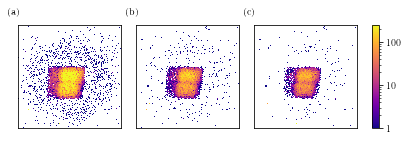

In [60]:
%matplotlib inline
#grob

fig = plt.figure(figsize=(6.48,5.5))
# fig.suptitle('Gd M5 scattering, no filter')
grid = ImageGrid(fig, 111,          # as in plt.subplot(111)
                 nrows_ncols=(1,3),
                 axes_pad=(0.2, 0.35),
                 share_all=True,
                 cbar_location="right",
                 cbar_mode="single",
                 cbar_size="7%",
                 #cbar_pad=0.15,
                 )
imgs = []

image = imread(data_path + 'th_150_resonance/single_count_mask_only_th_150_sum_50000.tiff')
image = image[80:320, 80:320]
graph = image.astype(np.float64)
graph[image == 0] = np.nan
imgs.append(graph)

image = imread(data_path + 'th_170_resonance/single_count_mask_only_th_170_sum_50000.tiff')
image = image[80:320, 80:320]
graph = image.astype(np.float64)
graph[image == 0] = np.nan
imgs.append(graph)

image = imread(data_path + 'th_180_resonance/single_count_mask_only_th_180_sum_50000.tiff')
image = image[80:320, 80:320]
graph = image.astype(np.float64)
graph[image == 0] = np.nan
imgs.append(graph)

letters = ['(a)', '(b)', '(c)']

for axis, img, letter in zip(grid, imgs, letters):
    #axis.axis('off')
    axis.set_xticks([]) 
    axis.set_yticks([])
    axis.text(-0.1, 1.1, letter, transform=axis.transAxes,)
    im = axis.pcolormesh(img, cmap=cmap, norm=lognorm,rasterized=True )

#axis.annotate("center of transfomration", (30,99),(150, 10),arrowprops=prop)
cb = axis.cax.colorbar(im,  format=FuncFormatter(lambda x, pos: r"%d" % x if x != 1 else "1"))
    # cb = f.colorbar(im, orientation='vertical', ax=axs[2], fraction=0.043, pad=0.04,)

#fig.tight_layout()

In [61]:
fig.savefig(plots_output_path + 'th_150_170_180.pgf',bbox_inches='tight', pad_inches=0, dpi=500)

C:\Users\lunin\AppData\Local\Temp/ipykernel_15992/4232310560.py:53: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


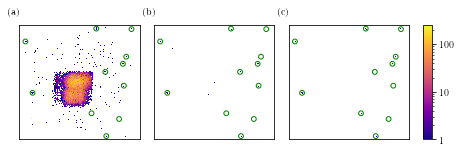

In [18]:
%matplotlib inline
#grob

fig = plt.figure(figsize=(6.48,5.5))
# fig.suptitle('Gd M5 scattering, no filter')
grid = ImageGrid(fig, 111,          # as in plt.subplot(111)
                 nrows_ncols=(1,3),
                 axes_pad=(0.2, 0.35),
                 share_all=True,
                 cbar_location="right",
                 cbar_mode="single",
                 cbar_size="7%",
                 #cbar_pad=0.15,
                 )
imgs = []

image = imread(data_path + 'th_180_resonance/single_count_mask_only_th_180_sum_50000.tiff')
image = image[80:320, 80:320]
image1 = image
graph = image.astype(np.float64)
graph[image == 0] = np.nan
imgs.append(graph)

image = imread(data_path + 'th_other_resonance/single_count_mask_only_th_450_sum_50000.tiff')
image = image[80:320, 80:320]
image2 = image
graph = image.astype(np.float64)
graph[image == 0] = np.nan
imgs.append(graph)

image = imread(data_path + 'th_other_resonance/single_count_mask_only_th_600_sum_50000.tiff')
image = image[80:320, 80:320]
image2 = image
graph = image.astype(np.float64)
graph[image == 0] = np.nan
imgs.append(graph)

letters = ['(a)', '(b)', '(c)']
spots = [(28,98), (162,233), (218,159), (183, 7), (181,142), (220,113), (210,43), (13,206),  (152,55), (236,232), (225,174)]

for axis, img, letter in zip(grid, imgs, letters):
    #axis.axis('off')
    axis.set_xticks([]) 
    axis.set_yticks([])
    axis.text(-0.1, 1.1, letter, transform=axis.transAxes,)
    im = axis.pcolormesh(img, cmap=cmap, norm=lognorm,rasterized=True )
    for spot in spots:
        circle = matplotlib.patches.Circle(spot, radius=5, fill=False, ec='green')
        axis.add_patch(circle)
cb = axis.cax.colorbar(im,  format=FuncFormatter(lambda x, pos: r"%d" % x if x != 1 else "1"))
    # cb = f.colorbar(im, orientation='vertical', ax=axs[2], fraction=0.043, pad=0.04,)

fig.tight_layout()

In [19]:
fig.savefig(plots_output_path + 'th_180_450_600.pgf',bbox_inches='tight', pad_inches=0, dpi=500)

### Polar transform

<IPython.core.display.Javascript object>


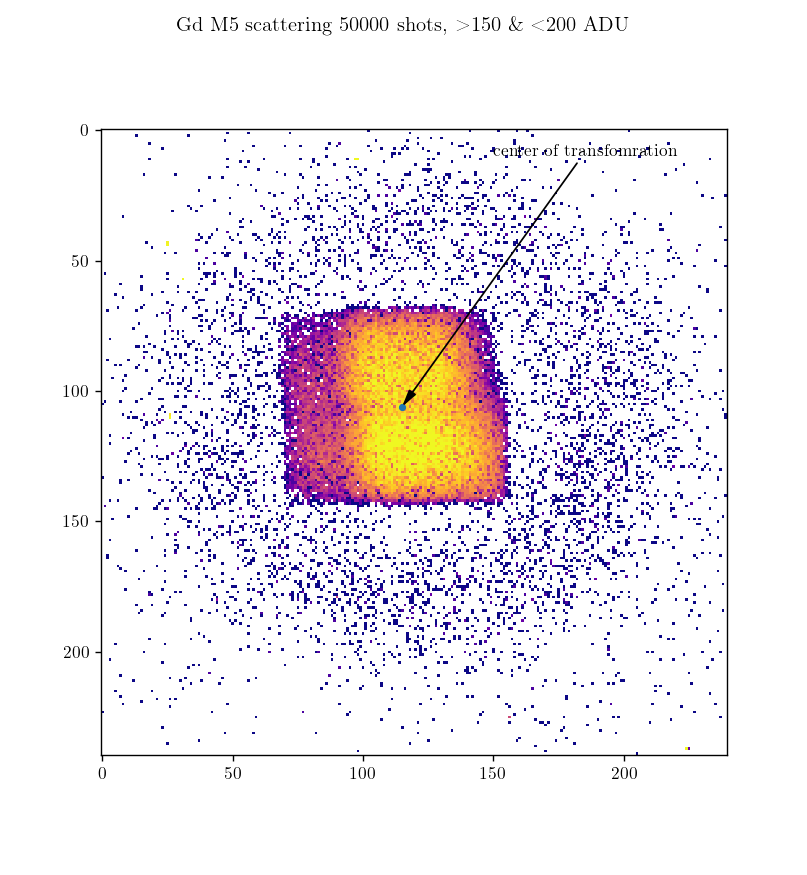

Text(150, 10, 'center of transfomration')

In [12]:
%matplotlib notebook
plt.rcParams["figure.figsize"] = (6.46,7)
plt.suptitle('Gd M5 scattering 50000 shots, >150 \& <200 ADU')
cmap = matplotlib.cm.get_cmap('plasma').copy()
image = imread('bachelorarbeit/220501_pictures/scattering/th_150_200_resonance/single_count_mask_only_th_150_200_sum_50000.tiff')
crop = image[80:320, 80:320]
plt.imshow(crop, norm=lognorm, cmap=cmap, interpolation='none', resample=False)
plt.scatter(115,106, s=10)
#plt.scatter(106, 115, s=10)
prop = dict(arrowstyle="-|>,head_width=0.2,head_length=0.8",
            shrinkA=0,shrinkB=0, fc='k', ec='k')

plt.annotate("center of transfomration", (115,106),(150, 10),arrowprops=prop)

(600, 600, 3)


Text(0, 0.5, 'phi')

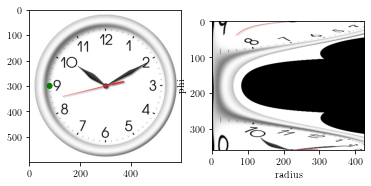

In [178]:
image = imread('C:/Users/lunin/Downloads/pl-245-01.jpg')
print(image.shape)
image_polar = skimage.transform.warp_polar(image, center=(300,80),  channel_axis=-1)
plt.subplot(121)
plt.imshow(image)
center = matplotlib.patches.Circle((80,300), ec='green', fc='green', radius=10)
plt.gca().add_patch(center)
plt.subplot(122)
plt.imshow(image_polar)
plt.xlabel('radius')
plt.ylabel('phi')

In [15]:
import matplotlib.patches as patches


(170, 360)


C:\Users\lunin\AppData\Local\Temp/ipykernel_14900/2617110513.py:79: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


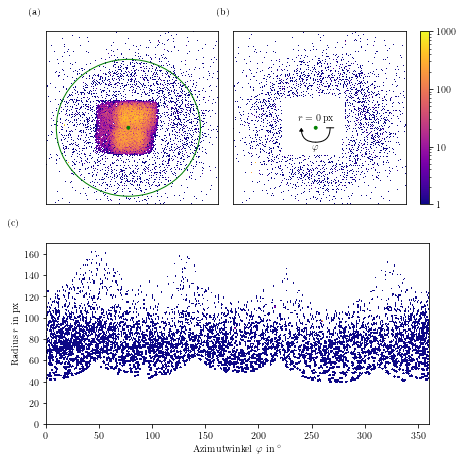

In [16]:
%matplotlib inline 
#grob
fig = plt.figure(figsize=(6.48,6.0))
(subfig_l, subfig_r) = fig.subfigures(nrows=2, ncols=1, height_ratios=(1,1), hspace=0.0)
grid = ImageGrid(subfig_l, 111,          # as in plt.subplot(111)
                 nrows_ncols=(1,2),
                 axes_pad=(0.2, 0.0),
                 share_all=True,
                 cbar_location="right",
                 cbar_mode="single",
                 cbar_size="5%",)
                 #cbar_pad=0.15,
imgs = []
                 
image = imread('220501_pictures/scattering/th_150_200_resonance/single_count_mask_only_th_150_200_sum_50000.tiff')
image = image[80:320, 80:320]
graph = image.astype(np.float64)
graph[image == 0] = np.nan
imgs.append(graph)

image = imread('220501_pictures/scattering/th_150_200_resonance/single_count_mask_only_th_150_200_sum_50000.tiff')
image_masked = np.array(image)
image_masked = image_masked[80:320, 80:320]
image_masked[68:148,68:152] = 0
image_masked[91:152,150:156] = 0
imgs.append(image_masked)

image_polar = skimage.transform.warp_polar(image_masked,center=(106, 115))
letters = ['(a)', '(b)', '(c)']

axe = subfig_r.add_subplot(1,1,1)
#axe.set_title('polar')
axe.set_ylabel('Radius $r$ in px')
axe.set_xlabel('Azimutwinkel $\\varphi$ in \\si{\\degree}')
graph = image_polar.astype(np.float64)
graph[image_polar == 0] = np.nan
im = axe.pcolormesh(graph.T, cmap=cmap,rasterized=True,)
print(graph.T.shape)
axe.set_aspect('1')
axe.text(-0.1, 1.1, letters[2], transform=axe.transAxes,)

for axis, img, letter in zip(grid, imgs, letters):
    #axis.axis('off')
    axis.set_xticks([]) 
    axis.set_yticks([])
    axis.text(-0.1, 1.1, letter, transform=axis.transAxes,)
    im = axis.pcolormesh(img, cmap=cmap, norm=lognorm,rasterized=True)
    #fig.colorbar(ims[c], orientation='horizontal', ax=axis, fraction=0.043, pad=0.04,)
    axis.cax.colorbar(im,  format=FuncFormatter(lambda x, pos: r"%d" % x if x != 1 else "1"))

a3 = patches.FancyArrowPatch((115+20, 106), (115, 106-20), arrowstyle="-",
                             connectionstyle="angle3,angleA=90,angleB=0", shrinkA=0,shrinkB=0,  fc='k', ec='k')
a4 = patches.FancyArrowPatch((115, 106-20), (115-20, 106), arrowstyle="-|>,head_width=1.7,head_length=2.5",
                             connectionstyle="angle3,angleA=0,angleB=90", shrinkA=0,shrinkB=0,  fc='k', ec='k')

end_line = patches.FancyArrowPatch((115+20-5, 106), (115+20+5, 106), arrowstyle="-", shrinkA=0,shrinkB=0,  fc='k', ec='k')
grid[1].add_patch(a3)
grid[1].add_patch(a4)
grid[1].add_patch(end_line)

grid[1].text(115, 106-30, '$\\varphi$', ha='center')

center = matplotlib.patches.Circle((115,106), ec='green', fc='green', radius=2)

grid[1].add_patch(center)
ellipse1 = matplotlib.patches.Ellipse((115,106), width=2*100, height=2*95, fill=False )
#grid[1].add_patch(ellipse1)
#grid[0].add_patch(center)

grid[1].text(115, 106+10, '$r = \\SI{0}{px}$', ha='center')

center_old = matplotlib.patches.Circle((115,106), ec='green', fc='green', radius=2)
ellipse_old = matplotlib.patches.Ellipse((115,106), width=2*100, height=2*95, ec='green',fill=False )

grid[0].add_patch(center_old)
grid[0].add_patch(ellipse_old)


fig.tight_layout()

In [103]:
fig.savefig(plots_output_path + 'th_150_200_masked_radial_transform.pgf',bbox_inches='tight', pad_inches=0, dpi=500)

<IPython.core.display.Javascript object>


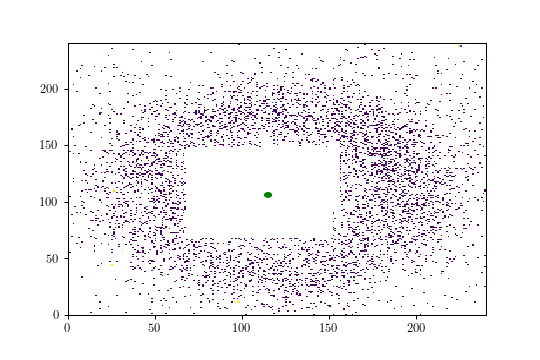

image masked sum: 12496 and polar sum: 0.00029989659329586764
(360, 170)


In [15]:
%matplotlib notebook
plt.pcolormesh(image_masked, norm=lognorm)
center = matplotlib.patches.Circle((115,106), ec='green', fc='green', radius=2)
plt.gca().add_patch(center)
image_polar = skimage.transform.warp_polar(image_masked,center=(115, 106))
print(f'image masked sum: {image_masked.sum(axis=(0,1))} and polar sum: {(image_polar.sum(axis=0)*np.arange(0,170)).sum()}')
print(image_polar.shape)

In [113]:
Ellipse?

In [185]:
image_polar[0].shape

(170,)

In [23]:
import lmfit
from lmfit.models import GaussianModel

In [18]:
def pxtomm(x):
    return x*10/400


def mmtopx(x):
    return x/10*400


[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 25
    # data points      = 162
    # variables        = 3
    chi-square         = 1.0191e-15
    reduced chi-square = 6.4097e-18
    Akaike info crit   = -6410.40124
    Bayesian info crit = -6401.13845
[[Variables]]
    amplitude:  1.8168e-06 +/- 2.6164e-08 (1.44%) (init = 2.734402e-06)
    center:     73.9506425 +/- 0.29638580 (0.40%) (init = 72.52778)
    sigma:      17.7208401 +/- 0.29070508 (1.64%) (init = 20)
    fwhm:       41.7293886 +/- 0.68455814 (1.64%) == '2.3548200*sigma'
    height:     4.0901e-08 +/- 5.5778e-10 (1.36%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma)  =  0.615
    C(amplitude, center) =  0.122
17.72084008378656


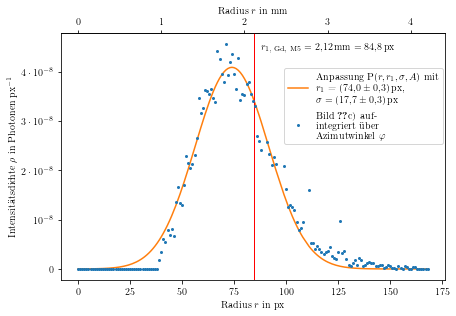

In [64]:
%matplotlib inline
mod = GaussianModel()
fig = plt.figure(figsize=(6.48,4.5))
axis = fig.gca()
azimutal_integrated = image_polar.sum(axis=0)
azimutal_integrated = azimutal_integrated[:169]
args = np.argwhere(azimutal_integrated < 4.729e-8)
radius = np.arange(0,169)
radius_fixed = radius[args][:,0]
azimutal_integrated_fixed= azimutal_integrated[args][:,0]
#plt.plot(radius, azimutal_integrated)
axis.errorbar(radius_fixed, azimutal_integrated_fixed, fmt='o', markersize=2, label='Bild \\ref{fig:th-150-200-maske-radial-transform}c) auf-\nintegriert über\nAzimutwinkel $\\varphi$')
params = mod.guess(x=radius_fixed, data=azimutal_integrated_fixed)
result = mod.fit(azimutal_integrated_fixed, params=params, x=radius_fixed)
print(result.fit_report())
axis.plot(radius_fixed, result.best_fit, label='Anpassung $\\mathrm{P}(r, r_1, \\sigma, A)$ mit\n$r_1$ = \\SI{74.0(3)}{px},\n$\\sigma = \\SI{17.7(3)}{px}$') #\n$A = \\SI{1.82(3)e-6}{Ph\ px ^{-1}}$')
axis.axvline(mmtopx(2.12), linestyle="-", color='red', linewidth=1, alpha=1)
axis.text(mmtopx(2.12)+3, 4.45e-8, '$r_{1, \\text{ Gd, M5}} = \\SI{2.12}{\\milli\\meter}= \\SI{%1.1f}{px}$' % mmtopx(2.12), ) 
#plt.axvline(84.24, color = 'green', label='expected $r_{M4} =$ \\SI{2.10}{\\milli\\meter} (84{,}8px) ring radius')
print(result.best_values['sigma'])
axis.set_xlabel('Radius $r$ in px')
axis.set_ylabel('Intensitätsdichte $\\rho$ in Photonen px$^{-1}$')
axis.yaxis.set_major_formatter(FuncFormatter(lambda x, pos: r"\num{%1.0e}" % x if x != 0 else "0"))

secax = axis.secondary_xaxis('top', functions=(pxtomm, mmtopx))
secax.set_xlabel('Radius $r$ in mm')

#axis.legend(loc='center right')
axis.legend(loc=(0.58, 0.55))
fig.tight_layout()

In [65]:
fig.savefig(plots_output_path + 'radius_fit.pgf',bbox_inches='tight', pad_inches=0, dpi=500)

## Clustering

C:\Users\lunin\AppData\Local\Temp/ipykernel_17508/1107895574.py:66: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


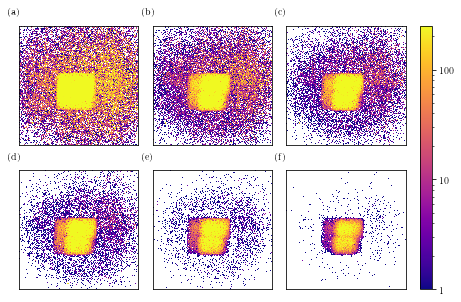

In [91]:
%matplotlib inline
#grob

fig = plt.figure(figsize=(6.48,7.5))
# fig.suptitle('Gd M5 scattering, no filter')
grid = ImageGrid(fig, 111,          # as in plt.subplot(111)
                 nrows_ncols=(2,3),
                 axes_pad=(0.2, 0.35),
                 share_all=True,
                 cbar_location="right",
                 cbar_mode="single",
                 cbar_size="5%",
                 #cbar_pad=0.15,
                 )
imgs = []
image = imread(data_path + 'cl_2_th_150_resonance/single_count_mask_cl_2_th_150_sum_50000.tiff')
image = image[80:320, 80:320]
graph = image.astype(np.float64)
graph[image == 0] = np.nan
imgs.append(graph)

image = imread(data_path + 'cl_2_th_180_resonance/single_count_mask_cl_2_th_180_sum_50000.tiff')
image = image[80:320, 80:320]
graph = image.astype(np.float64)
graph[image == 0] = np.nan
imgs.append(graph)

image = imread(data_path + 'cl_2_th_200_resonance/single_count_mask_cl_2_th_200_sum_50000.tiff')
image = image[80:320, 80:320]
graph = image.astype(np.float64)
graph[image == 0] = np.nan
imgs.append(graph)

image = imread(data_path + 'cl_2_th_220_resonance/single_count_mask_cl_2_th_220_sum_50000.tiff')
image = image[80:320, 80:320]
graph = image.astype(np.float64)
graph[image == 0] = np.nan
imgs.append(graph)

image = imread(data_path + 'cl_2_th_250_resonance/single_count_mask_cl_2_th_250_sum_50000.tiff')
image = image[80:320, 80:320]
graph = image.astype(np.float64)
graph[image == 0] = np.nan
imgs.append(graph)

image = imread(data_path + 'cl_2_th_290_resonance/single_count_mask_cl_2_th_290_sum_50000.tiff')
image = image[80:320, 80:320]
graph = image.astype(np.float64)
graph[image == 0] = np.nan
imgs.append(graph)


letters = ['(a)', '(b)', '(c)', '(d)', '(e)', '(f)']

for axis, img, letter in zip(grid, imgs, letters):
    #axis.axis('off')
    axis.set_xticks([]) 
    axis.set_yticks([])
    axis.text(-0.1, 1.1, letter, transform=axis.transAxes,)
    im = axis.pcolormesh(img, cmap=cmap, norm=lognorm,rasterized=True )

#axis.annotate("center of transfomration", (30,99),(150, 10),arrowprops=prop)
cb = axis.cax.colorbar(im,  format=FuncFormatter(lambda x, pos: r"%d" % x if x != 1 else "1"))
    # cb = f.colorbar(im, orientation='vertical', ax=axs[2], fraction=0.043, pad=0.04,)

fig.tight_layout()


In [92]:
fig.savefig(plots_output_path + 'cl_2_150_180_200_220_250_290_resonance.pgf',bbox_inches='tight', pad_inches=0, dpi=500)

C:\Users\lunin\AppData\Local\Temp/ipykernel_21784/100662026.py:65: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


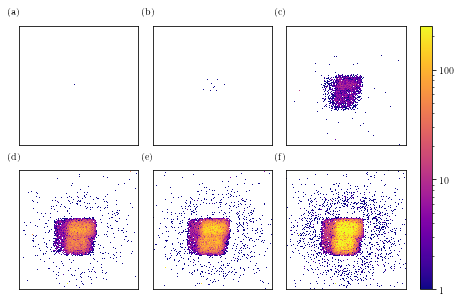

In [57]:
%matplotlib inline
#grob

fig = plt.figure(figsize=(6.48,7.5))
# fig.suptitle('Gd M5 scattering, no filter')
grid = ImageGrid(fig, 111,          # as in plt.subplot(111)
                 nrows_ncols=(2,3),
                 axes_pad=(0.2, 0.35),
                 share_all=True,
                 cbar_location="right",
                 cbar_mode="single",
                 cbar_size="5%",
                 #cbar_pad=0.15,
                 )
imgs = []
image = imread(data_path + 'th_150_resonance/single_count_mask_only_th_150_sum_1.tiff')
image = image[80:320, 80:320]
graph = image.astype(np.float64)
graph[image == 0] = np.nan
imgs.append(graph)

image = imread(data_path + 'th_150_resonance/single_count_mask_only_th_150_sum_5.tiff')
image = image[80:320, 80:320]
graph = image.astype(np.float64)
graph[image == 0] = np.nan
imgs.append(graph)

image = imread(data_path + 'th_150_resonance/single_count_mask_only_th_150_sum_1000.tiff')
image = image[80:320, 80:320]
graph = image.astype(np.float64)
graph[image == 0] = np.nan
imgs.append(graph)

image = imread(data_path + 'th_150_resonance/single_count_mask_only_th_150_sum_10000.tiff')
image = image[80:320, 80:320]
graph = image.astype(np.float64)
graph[image == 0] = np.nan
imgs.append(graph)

image = imread(data_path + 'th_150_resonance/single_count_mask_only_th_150_sum_20000.tiff')
image = image[80:320, 80:320]
graph = image.astype(np.float64)
graph[image == 0] = np.nan
imgs.append(graph)

image = imread(data_path + 'th_150_resonance/single_count_mask_only_th_150_sum_50000.tiff')
image = image[80:320, 80:320]
graph = image.astype(np.float64)
graph[image == 0] = np.nan
imgs.append(graph)

letters = ['(a)', '(b)', '(c)', '(d)', '(e)', '(f)']

for axis, img, letter in zip(grid, imgs, letters):
    #axis.axis('off')
    axis.set_xticks([]) 
    axis.set_yticks([])
    axis.text(-0.1, 1.1, letter, transform=axis.transAxes,)
    im = axis.pcolormesh(img, cmap=cmap, norm=lognorm,rasterized=True )

#axis.annotate("center of transfomration", (30,99),(150, 10),arrowprops=prop)
cb = axis.cax.colorbar(im,  format=FuncFormatter(lambda x, pos: r"%d" % x if x != 1 else "1"))
    # cb = f.colorbar(im, orientation='vertical', ax=axs[2], fraction=0.043, pad=0.04,)

fig.tight_layout()


In [58]:
fig.savefig(plots_output_path + 'th_150_sums.pgf',bbox_inches='tight', pad_inches=0, dpi=500)

In [ ]:
%matplotlib inline
#grob

fig = plt.figure(figsize=(6.48,5.5))
# fig.suptitle('Gd M5 scattering, no filter')
grid = ImageGrid(fig, 111,          # as in plt.subplot(111)
                 nrows_ncols=(1,3),
                 axes_pad=(0.1, 0.25),
                 share_all=True,
                 cbar_location="right",
                 cbar_mode="single",
                 cbar_size="7%",
                 #cbar_pad=0.15,
                 )
imgs = []

image = imread(data_path + 'th_150_resonance/single_count_mask_only_th_150_sum_50000.tiff')
image = image[80:320, 80:320]
graph = image.astype(np.float64)
graph[image == 0] = np.nan
imgs.append(graph)

image = imread(data_path + 'th_170_resonance/single_count_mask_only_th_170_sum_50000.tiff')
image = image[80:320, 80:320]
graph = image.astype(np.float64)
graph[image == 0] = np.nan
imgs.append(graph)

image = imread(data_path + 'th_180_resonance/single_count_mask_only_th_180_sum_50000.tiff')
image = image[80:320, 80:320]
graph = image.astype(np.float64)
graph[image == 0] = np.nan
imgs.append(graph)

letters = ['(a)', '(b)', '(c)']

for axis, img, letter in zip(grid, imgs, letters):
    #axis.axis('off')
    axis.set_xticks([]) 
    axis.set_yticks([])
    axis.text(0, 300, letter)
    im = axis.pcolormesh(img, cmap=cmap, norm=lognorm,rasterized=True )

#axis.annotate("center of transfomration", (30,99),(150, 10),arrowprops=prop)
cb = axis.cax.colorbar(im,  format=FuncFormatter(lambda x, pos: r"%d" % x if x != 1 else "1"))
    # cb = f.colorbar(im, orientation='vertical', ax=axs[2], fraction=0.043, pad=0.04,)
ticklabs = cb.ax.get_yticklabels()
for t in ticklabs:
    t.set_verticalalignment('center')

fig.tight_layout()

In [ ]:
fig.savefig(plots_output_path + 'th_150_170_180.pgf',bbox_inches='tight', pad_inches=0, dpi=500)

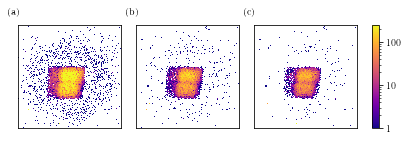

In [60]:
%matplotlib inline
#grob

fig = plt.figure(figsize=(6.48,5.5))
# fig.suptitle('Gd M5 scattering, no filter')
grid = ImageGrid(fig, 111,          # as in plt.subplot(111)
                 nrows_ncols=(1,3),
                 axes_pad=(0.2, 0.35),
                 share_all=True,
                 cbar_location="right",
                 cbar_mode="single",
                 cbar_size="7%",
                 #cbar_pad=0.15,
                 )
imgs = []

image = imread(data_path + 'th_150_resonance/single_count_mask_only_th_150_sum_50000.tiff')
image = image[80:320, 80:320]
graph = image.astype(np.float64)
graph[image == 0] = np.nan
imgs.append(graph)

image = imread(data_path + 'th_170_resonance/single_count_mask_only_th_170_sum_50000.tiff')
image = image[80:320, 80:320]
graph = image.astype(np.float64)
graph[image == 0] = np.nan
imgs.append(graph)

image = imread(data_path + 'th_180_resonance/single_count_mask_only_th_180_sum_50000.tiff')
image = image[80:320, 80:320]
graph = image.astype(np.float64)
graph[image == 0] = np.nan
imgs.append(graph)

letters = ['(a)', '(b)', '(c)']

for axis, img, letter in zip(grid, imgs, letters):
    #axis.axis('off')
    axis.set_xticks([]) 
    axis.set_yticks([])
    axis.text(-0.1, 1.1, letter, transform=axis.transAxes,)
    im = axis.pcolormesh(img, cmap=cmap, norm=lognorm,rasterized=True )

#axis.annotate("center of transfomration", (30,99),(150, 10),arrowprops=prop)
cb = axis.cax.colorbar(im,  format=FuncFormatter(lambda x, pos: r"%d" % x if x != 1 else "1"))
    # cb = f.colorbar(im, orientation='vertical', ax=axs[2], fraction=0.043, pad=0.04,)

#fig.tight_layout()

In [61]:
fig.savefig(plots_output_path + 'th_150_170_180.pgf',bbox_inches='tight', pad_inches=0, dpi=500)

C:\Users\lunin\AppData\Local\Temp/ipykernel_15992/4232310560.py:53: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


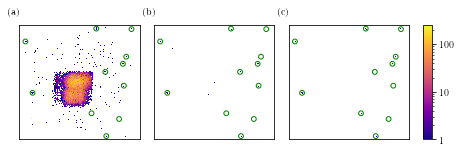

In [18]:
%matplotlib inline
#grob

fig = plt.figure(figsize=(6.48,5.5))
# fig.suptitle('Gd M5 scattering, no filter')
grid = ImageGrid(fig, 111,          # as in plt.subplot(111)
                 nrows_ncols=(1,3),
                 axes_pad=(0.2, 0.35),
                 share_all=True,
                 cbar_location="right",
                 cbar_mode="single",
                 cbar_size="7%",
                 #cbar_pad=0.15,
                 )
imgs = []

image = imread(data_path + 'th_180_resonance/single_count_mask_only_th_180_sum_50000.tiff')
image = image[80:320, 80:320]
image1 = image
graph = image.astype(np.float64)
graph[image == 0] = np.nan
imgs.append(graph)

image = imread(data_path + 'th_other_resonance/single_count_mask_only_th_450_sum_50000.tiff')
image = image[80:320, 80:320]
image2 = image
graph = image.astype(np.float64)
graph[image == 0] = np.nan
imgs.append(graph)

image = imread(data_path + 'th_other_resonance/single_count_mask_only_th_600_sum_50000.tiff')
image = image[80:320, 80:320]
image2 = image
graph = image.astype(np.float64)
graph[image == 0] = np.nan
imgs.append(graph)

letters = ['(a)', '(b)', '(c)']
spots = [(28,98), (162,233), (218,159), (183, 7), (181,142), (220,113), (210,43), (13,206),  (152,55), (236,232), (225,174)]

for axis, img, letter in zip(grid, imgs, letters):
    #axis.axis('off')
    axis.set_xticks([]) 
    axis.set_yticks([])
    axis.text(-0.1, 1.1, letter, transform=axis.transAxes,)
    im = axis.pcolormesh(img, cmap=cmap, norm=lognorm,rasterized=True )
    for spot in spots:
        circle = matplotlib.patches.Circle(spot, radius=5, fill=False, ec='green')
        axis.add_patch(circle)
cb = axis.cax.colorbar(im,  format=FuncFormatter(lambda x, pos: r"%d" % x if x != 1 else "1"))
    # cb = f.colorbar(im, orientation='vertical', ax=axs[2], fraction=0.043, pad=0.04,)

fig.tight_layout()

In [19]:
fig.savefig(plots_output_path + 'th_180_450_600.pgf',bbox_inches='tight', pad_inches=0, dpi=500)

# Off resonance

## Thresholding

C:\Users\lunin\AppData\Local\Temp/ipykernel_12220/205817315.py:64: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


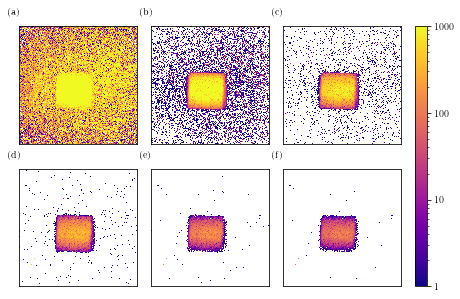

In [108]:
%matplotlib inline
#grob

fig = plt.figure(figsize=(6.48,7.5))
# fig.suptitle('Gd M5 scattering, no filter')
grid = ImageGrid(fig, 111,          # as in plt.subplot(111)
                 nrows_ncols=(2,3),
                 axes_pad=(0.2, 0.35),
                 share_all=True,
                 cbar_location="right",
                 cbar_mode="single",
                 cbar_size="5%",
                 #cbar_pad=0.15,
                 )
imgs = []
image = imread(data_path + 'th_50_off_resonance/single_count_mask_only_th_50_sum_50000.tiff')
image = image[80:320, 80:320]
graph = image.astype(np.float64)
graph[image == 0] = np.nan
imgs.append(graph)

image = imread(data_path + 'th_100_off_resonance/single_count_mask_only_th_100_sum_50000.tiff')
image = image[80:320, 80:320]
graph = image.astype(np.float64)
graph[image == 0] = np.nan
imgs.append(graph)

image = imread(data_path + 'th_125_off_resonance/single_count_mask_only_th_125_sum_50000.tiff')
image = image[80:320, 80:320]
graph = image.astype(np.float64)
graph[image == 0] = np.nan
imgs.append(graph)

image = imread(data_path + 'th_150_off_resonance/single_count_mask_only_th_150_sum_50000.tiff')
image = image[80:320, 80:320]
graph = image.astype(np.float64)
graph[image == 0] = np.nan
imgs.append(graph)

image = imread(data_path + 'th_170_off_resonance/single_count_mask_only_th_170_sum_50000.tiff')
image = image[80:320, 80:320]
graph = image.astype(np.float64)
graph[image == 0] = np.nan
imgs.append(graph)

image = imread(data_path + 'th_180_off_resonance/single_count_mask_only_th_180_sum_50000.tiff')
image = image[80:320, 80:320]
graph = image.astype(np.float64)
graph[image == 0] = np.nan
imgs.append(graph)

letters = ['(a)', '(b)', '(c)', '(d)', '(e)', '(f)']

for axis, img, letter in zip(grid, imgs, letters):
    #axis.axis('off')
    axis.set_xticks([]) 
    axis.set_yticks([])
    axis.text(-0.1, 1.1, letter, transform=axis.transAxes,)
    im = axis.pcolormesh(img, cmap=cmap, norm=lognorm,rasterized=True )

#axis.annotate("center of transfomration", (30,99),(150, 10),arrowprops=prop)
cb = axis.cax.colorbar(im,  format=FuncFormatter(lambda x, pos: r"%d" % x if x != 1 else "1"))
    # cb = f.colorbar(im, orientation='vertical', ax=axs[2], fraction=0.043, pad=0.04,)
fig.tight_layout()


In [109]:
fig.savefig(plots_output_path + 'th_50_100_125_150_170_180_off_resonance.pgf',bbox_inches='tight', pad_inches=0, dpi=500)

## Clustering

C:\Users\lunin\AppData\Local\Temp/ipykernel_17508/2664992007.py:64: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


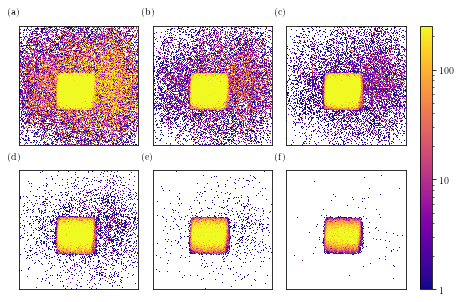

In [89]:
%matplotlib inline
#grob

fig = plt.figure(figsize=(6.48,7.5))
# fig.suptitle('Gd M5 scattering, no filter')
grid = ImageGrid(fig, 111,          # as in plt.subplot(111)
                 nrows_ncols=(2,3),
                 axes_pad=(0.2, 0.35),
                 share_all=True,
                 cbar_location="right",
                 cbar_mode="single",
                 cbar_size="5%",
                 #cbar_pad=0.15,
                 )
imgs = []
image = imread(data_path + 'cl_2_th_150_off_resonance/single_count_mask_cl_2_th_150_sum_50000.tiff')
image = image[80:320, 80:320]
graph = image.astype(np.float64)
graph[image == 0] = np.nan
imgs.append(graph)

image = imread(data_path + 'cl_2_th_180_off_resonance/single_count_mask_cl_2_th_180_sum_50000.tiff')
image = image[80:320, 80:320]
graph = image.astype(np.float64)
graph[image == 0] = np.nan
imgs.append(graph)

image = imread(data_path + 'cl_2_th_200_off_resonance/single_count_mask_cl_2_th_200_sum_50000.tiff')
image = image[80:320, 80:320]
graph = image.astype(np.float64)
graph[image == 0] = np.nan
imgs.append(graph)

image = imread(data_path + 'cl_2_th_220_off_resonance/single_count_mask_cl_2_th_220_sum_50000.tiff')
image = image[80:320, 80:320]
graph = image.astype(np.float64)
graph[image == 0] = np.nan
imgs.append(graph)

image = imread(data_path + 'cl_2_th_250_off_resonance/single_count_mask_cl_2_th_250_sum_50000.tiff')
image = image[80:320, 80:320]
graph = image.astype(np.float64)
graph[image == 0] = np.nan
imgs.append(graph)

image = imread(data_path + 'cl_2_th_290_off_resonance/single_count_mask_cl_2_th_290_sum_50000.tiff')
image = image[80:320, 80:320]
graph = image.astype(np.float64)
graph[image == 0] = np.nan
imgs.append(graph)

letters = ['(a)', '(b)', '(c)', '(d)', '(e)', '(f)']

for axis, img, letter in zip(grid, imgs, letters):
    #axis.axis('off')
    axis.set_xticks([]) 
    axis.set_yticks([])
    axis.text(-0.1, 1.1, letter, transform=axis.transAxes,)
    im = axis.pcolormesh(img, cmap=cmap, norm=lognorm,rasterized=True )

#axis.annotate("center of transfomration", (30,99),(150, 10),arrowprops=prop)
cb = axis.cax.colorbar(im,  format=FuncFormatter(lambda x, pos: r"%d" % x if x != 1 else "1"))
    # cb = f.colorbar(im, orientation='vertical', ax=axs[2], fraction=0.043, pad=0.04,)
fig.tight_layout()


In [90]:
fig.savefig(plots_output_path + 'cl_150_180_200_220_250_290_off_resonance.pgf',bbox_inches='tight', pad_inches=0, dpi=500)

# dark images

<IPython.core.display.Javascript object>


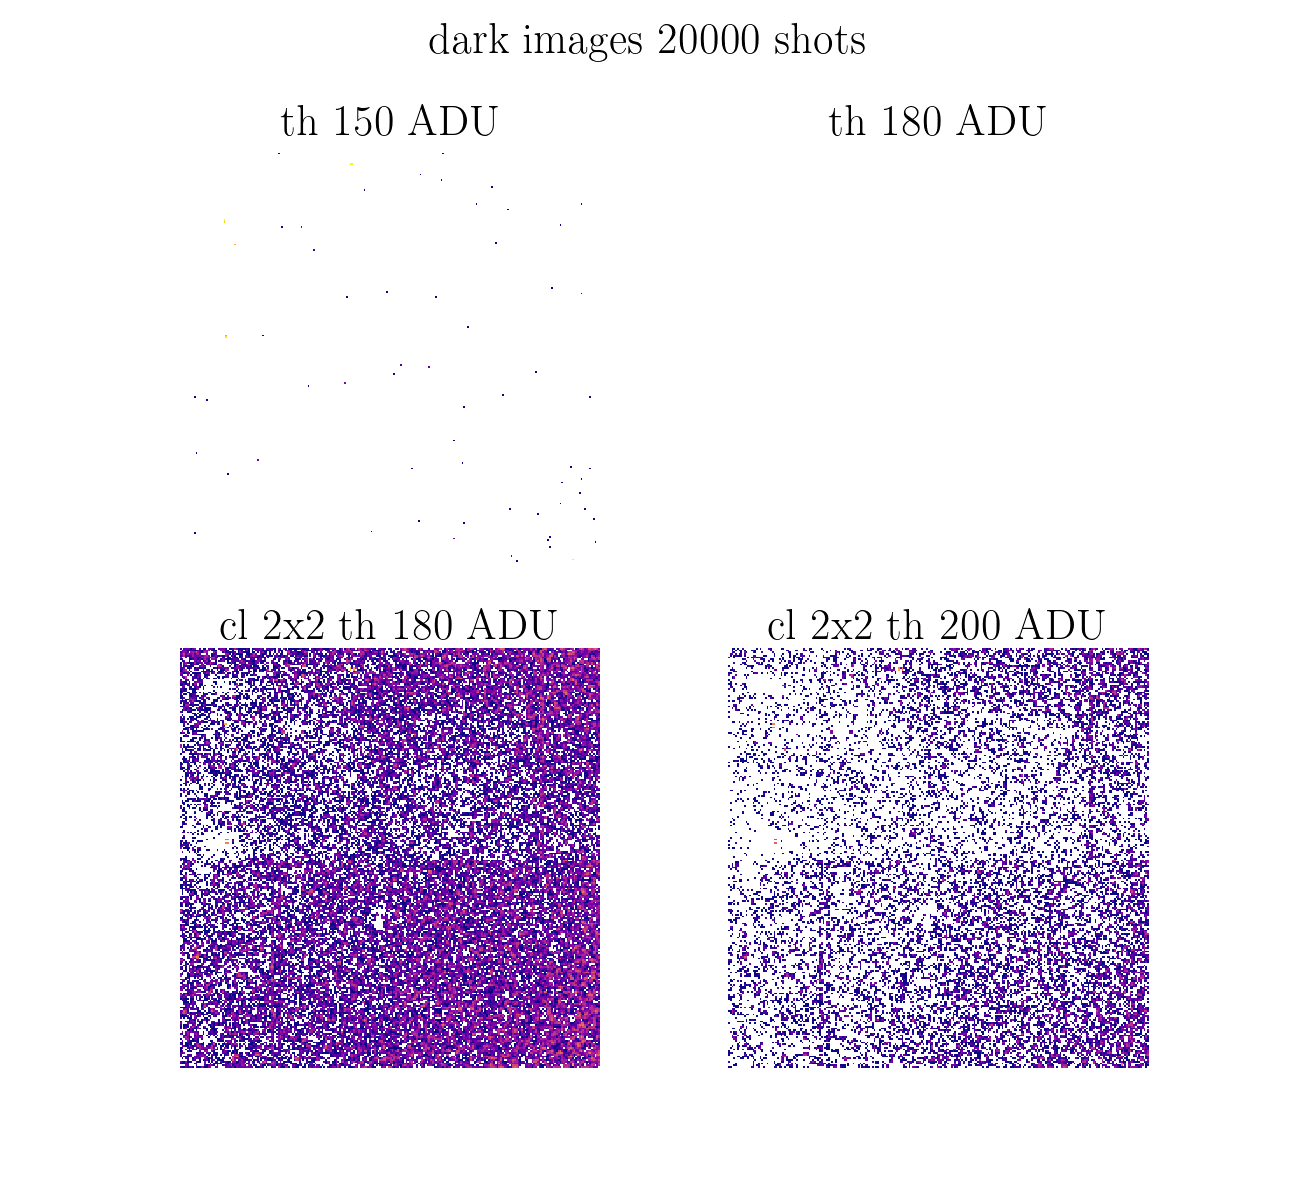

In [51]:
%matplotlib notebook
#grob

fig = plt.figure(figsize=(6.48,6))
fig.suptitle('dark images 20000 shots')
cmap = matplotlib.cm.get_cmap('plasma').copy()

axe = fig.add_subplot(2,2,1)
axe.set_title('th 150 ADU')
axe.axis('off')
axe.set_xticks([]) 
axe.set_yticks([])
image = imread('bachelorarbeit/220501_pictures/scattering/th_150_dark_capture/single_count_mask_only_th_150_sum_25000.tiff')
graph = image.astype(np.float64)
graph[image == 0] = np.nan
im = axe.imshow(graph[80:320, 80:320], norm=lognorm, cmap=cmap, interpolation='none', resample=False)

axe = fig.add_subplot(2,2,2)
axe.set_title('th 180 ADU')
axe.axis('off')
axe.set_xticks([]) 
axe.set_yticks([])
#image = imread('bachelorarbeit/220501_pictures/scattering/th_180_off_resonance/')
graph = image.astype(np.float64)
graph[image == 0] = np.nan
#im = axe.imshow(graph[80:320, 80:320], norm=lognorm, cmap=cmap, interpolation='none', resample=False)

axe = fig.add_subplot(2,2,3)
axe.set_title('cl 2x2 th 180 ADU')
axe.axis('off')
axe.set_xticks([]) 
axe.set_yticks([])
image = imread('bachelorarbeit/220501_pictures/scattering/cl_2_th_180_dark_capture/single_count_mask_cl_2_th_180_sum_10000.tiff')
graph = image.astype(np.float64)
graph[image == 0] = np.nan
im = axe.imshow(graph[80:320, 80:320], norm=lognorm, cmap=cmap, interpolation='none', resample=False)

axe = fig.add_subplot(2,2,4)
axe.set_title('cl 2x2 th 200 ADU')
axe.axis('off')
axe.set_xticks([]) 
axe.set_yticks([])
image = imread('bachelorarbeit/220501_pictures/scattering/cl_2_th_200_dark_capture/single_count_mask_cl_2_th_200_sum_10000.tiff')
graph = image.astype(np.float64)
graph[image == 0] = np.nan
im = axe.imshow(graph[80:320, 80:320], norm=lognorm, cmap=cmap, interpolation='none', resample=False)
#fig.savefig('test_ring.png', dpi=300, transparent=False)

# Histograms

In [52]:
hist_bins, noise_raw, noise_cl2, noise_cl3 =  np.loadtxt(data_path + 'noise_hist_070322.csv', delimiter=",", unpack=True)
hist_bins, signal_raw, signal_cl2, signal_cl3 =  np.loadtxt(data_path + 'signal_hist_070322.csv', delimiter=",", unpack=True)

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 17
    # data points      = 199
    # variables        = 3
    chi-square         = 3.1460e+12
    reduced chi-square = 1.6051e+10
    Akaike info crit   = 4679.28306
    Bayesian info crit = 4689.16297
[[Variables]]
    amplitude:  1.5884e+09 +/- 1304690.35 (0.08%) (init = 2.155606e+09)
    center:    -0.32332653 +/- 0.01891634 (5.85%) (init = -0.5)
    sigma:      19.9445019 +/- 0.01891635 (0.09%) (init = 22.5)
    fwhm:       46.9657120 +/- 0.04454459 (0.09%) == '2.3548200*sigma'
    height:     31772329.8 +/- 26097.2011 (0.08%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) =  0.577
19.944501922306635


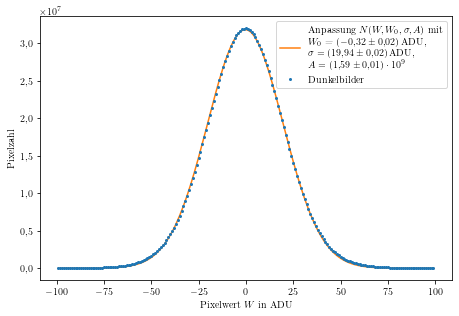

In [55]:
%matplotlib inline
mod = GaussianModel()
fig = plt.figure(figsize=(6.48,4.5))
axis = fig.gca()
x,y = hist_bins, noise_raw

args = np.argwhere(np.logical_and((x < 100), (x > -100)))
x = x[args][:,0]
y = y[args][:,0]


#plt.plot(radius, azimutal_integrated)
axis.errorbar(x, y, fmt='o', markersize=2, label='Dunkelbilder')
params = mod.guess(x=x, data=y)
result = mod.fit(y, params=params, x=x)
print(result.fit_report())
axis.plot(x, result.best_fit, label='Anpassung $N(W, W_0, \sigma, A)$ mit\n $W_0$ = \\SI{-0.32(2)}{ADU},\n$\\sigma = \\SI{19.94(2)}{ADU}$,\n$A = \\num{1.59(1)e9}$')
#plt.axvline(84.24, color = 'green', label='expected $r_{M4} =$ \\SI{2.10}{\\milli\\meter} (84{,}8px) ring radius')
print(result.best_values['sigma'])
axis.set_xlabel(r'Pixelwert $W$ in ADU')
axis.set_ylabel('Pixelzahl')
axis.yaxis.set_major_formatter(OOMFormatter(7))
axis.legend()
fig.tight_layout()


In [56]:
fig.savefig(plots_output_path + 'noise_hist_fit.pgf',bbox_inches='tight', pad_inches=0.1, dpi=500)

In [81]:
noises = (noise_raw, noise_cl2, noise_cl3)
signals = (signal_raw, signal_cl2, signal_cl3)

[50.0, 75.0, 100.0, 125.0, 150.0, 175.0, 72.0]
[100.0, 200.0, 300.0, 400.0, 500.0, 171.0]
[200.0, 300.0, 400.0, 500.0, 600.0, 277.0]


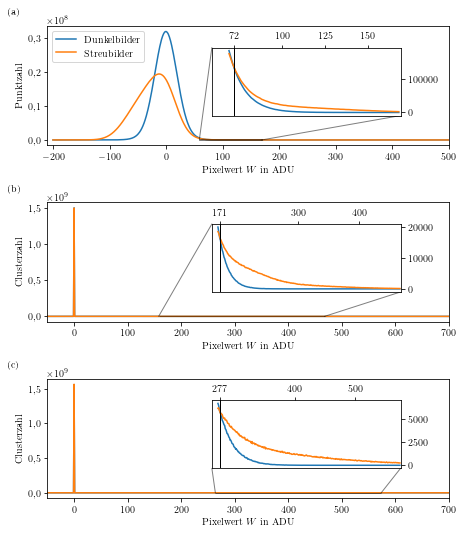

In [82]:
%matplotlib inline
#grob

fig = plt.figure(figsize=(6.48,7.5))
axes = fig.subplots(3,1)
titles = ('no processing', 'clustering 2x2', 'clustering 3x3')
c = 0
letters = ['(a)', '(b)', '(c)']
orders = [8, 9,9]
lims = [(-210,500), (-50, 700), (-50, 700)]
ylabels = ["Punktzahl", "Clusterzahl", "Clusterzahl"]
for axis, noise, signal, title, letter, order, lim, ylabel in zip(axes, noises, signals, titles, letters, orders, lims, ylabels):
    norm_coef = 1
    #norm_coef = max(np.max(noise), np.max(signal))
    noise = noise/norm_coef
    signal = signal/norm_coef
    axis.plot(hist_bins, noise, ms=2, color='C0', label=r'Dunkelbilder')
    axis.plot(hist_bins, signal, ms=2, color='C1', label=r'Streubilder')
    axis.text(-0.1, 1.1, letter, transform=axis.transAxes,)
    axis.set_xlim(lim)
    axis.yaxis.set_major_formatter(OOMFormatter(order=order))
    #axis.set_title(title)
    axis.set_ylabel(ylabel) # r"\begin{tabular}{c}Transmissions-\\ mittelwertsrate $\bar{\text{T}}$\end{tabular}"
    axins = axis.inset_axes([0.41, 0.25, 0.47, 0.57])
    args = np.argwhere(np.logical_and(signal >  noise, np.logical_and( hist_bins > 70, hist_bins < 450)))
    intersection_x = np.min(args)
    min_arg = intersection_x - 3   
    
    max_arg = min_arg + 300
    if c == 0:
        max_arg = min_arg + 100
    axins.plot(hist_bins[min_arg:max_arg], noise[min_arg:max_arg], ms=2, color='C0', label=r'noise')
    axins.plot(hist_bins[min_arg:max_arg], signal[min_arg:max_arg], ms=2, color='C1', label=r'signal')
    
    print(axins.get_xticks().tolist() + [hist_bins[intersection_x]])
    #axins.set_xticks()
    ticks = axins.get_xticks()
    ticks[1] = hist_bins[intersection_x]
    axins.set_xticks(ticks)
    axins.set_xlim(hist_bins[min_arg]-10, hist_bins[max_arg])
    axins.axvline(hist_bins[intersection_x], linestyle="-",color='black', linewidth=1, alpha=1)
    axins.xaxis.set_label_position('top')
    axins.xaxis.tick_top()
    axins.yaxis.set_label_position("right")
    axins.yaxis.tick_right()
    #axins.yaxis.set_major_formatter(FuncFormatter(lambda x, pos: r"\num{%1.1e}" % x if x != 0 else "0"))
    axis.indicate_inset_zoom(axins, edgecolor="black")
    axis.set_xlabel(r'Pixelwert $W$ in ADU')
    #axis.yaxis.set_major_formatter(FuncFormatter(lambda x, pos: r"\num{%1.1e}" % x if x != 0 else "0"))
    c+=1
    #axis.legend()
#axes.set_title('Soft X-Ray Range')
#axes.set_xlabel(r'Wiederholungszahl $N$ der Probe Ta(\SI{3}{\nano\meter})/[Fe(\SI{0.41}{\nano\meter})/Gd(\SI{0.45}{\nano\meter})]$_{\text{x}N}$/Ta(\SI{2}{\nano\meter})')
#axes.set_xscale('log')
#axes.set_ylabel(r"\begin{tabular}{c}Transmissions-\\ mittelwertsrate $\bar{\text{T}}$\end{tabular}")

#axes.grid(which='major')
#axes.grid(which='minor', color='#999999', linestyle='-', alpha=0.2)
#axes.xaxis.set_major_formatter(OOMFormatter(order = 0, fformat = "%1.0f"))
#axes.yaxis.set_major_formatter(OOMFormatter(order = 0, fformat = "%1.0f"))

# axes.xaxis.set_major_locator(FixedLocator(ticks))
# axes.xaxis.set_minor_locator(FixedLocator(subticks))
# axes.xaxis.set_major_formatter(NullFormatter())
# axes.set_ylim(0,1)
# axes.yaxis.set_major_locator(MultipleLocator(0.25))
# axes.set_xlim(0.2, 200.8)


# axes.yaxis.set_minor_locator(AutoMinorLocator(5))

#axes.set_title('Soft X-Ray Range')
#axes.set_xlabel(r'Wiederholungszahl $N$ der Probe Ta(\SI{3}{\nano\meter})/[Fe(\SI{0.41}{\nano\meter})/Gd(\SI{0.45}{\nano\meter})]$_{\text{x}N}$/Ta(\SI{2}{\nano\meter})')
#axes.set_xscale('log')
#axes.set_ylabel(r"\begin{tabular}{c}Polarisa-\\ tionsrate P\end{tabular}")

#axes.grid(which='major')
#axes.grid(which='minor', color='#999999', linestyle='-', alpha=0.2)
#axes.xaxis.set_major_formatter(OOMFormatter(order = 0, fformat = "%1.0f"))
#axes.yaxis.set_major_formatter(OOMFormatter(order = 0, fformat = "%1.0f"))
# axes.xaxis.set_major_locator(FixedLocator(ticks))
# axes.xaxis.set_minor_locator(FixedLocator(subticks))
# axes.xaxis.set_major_formatter(NullFormatter())
# axes.yaxis.set_major_locator(MultipleLocator(0.25))
# axes.set_xlim(0.2, 200.8)


# axes.yaxis.set_minor_locator(AutoMinorLocator(5))

axis = axes[2]
#axes.set_title('Soft X-Ray Range')
#axes.yaxis.set_label_position("right")
#axes.yaxis.tick_right()

#axes.set_xscale('log')
#axes.set_ylabel(r"\begin{tabular}{c}Gütezahlrate TP$^2$\end{tabular}")

#axes.grid(which='major')
#axes.grid(which='minor', color='#999999', linestyle='-', alpha=0.2)
#axes.xaxis.set_major_formatter(OOMFormatter(order = 0, fformat = "%1.0f"))
#axes.yaxis.set_major_formatter(OOMFormatter(order = 0, fformat = "%1.0f"))
# axes.xaxis.set_major_locator(FixedLocator(ticks))
# axes.xaxis.set_minor_locator(FixedLocator(subticks))
# axes.yaxis.set_major_locator(MultipleLocator(0.25))
# axes.set_xlim(0.2, 200.8)

fig.subplots_adjust(hspace=0.5)

# axes.yaxis.set_minor_locator(AutoMinorLocator(5))
# axes.yaxis.set_major_locator(MultipleLocator(50))
fig.tight_layout()
axes[0].legend()

In [83]:
fig.savefig(plots_output_path + 'no_pr_cl_2_cl_3_histograms.pgf',bbox_inches='tight', pad_inches=0, dpi=500)

# rzp_phi <=> eV

In [226]:
rzp_phi_1, smb_1_1, smb_2_1 =  np.loadtxt('rzp_phi_ev/rzp_phi_data_7.spec', delimiter=" ", unpack=True, usecols=[1, 8, 9])
rzp_phi_2, smb_1_2, smb_2_2 =  np.loadtxt('rzp_phi_ev/rzp_phi_data_9.spec', delimiter=" ", unpack=True, usecols=[1, 8, 9])
rzp_phi = np.concatenate((rzp_phi_1, rzp_phi_2))
smb_1 = np.concatenate((smb_1_1, smb_1_2))
smb_2 = np.concatenate((smb_2_1, smb_2_2))
print(np.min(rzp_phi), np.max(rzp_phi))
print((rzp_phi - np.roll(rzp_phi, -1)))

-111.504016 -49.997579
[ 5.0373400e-01  4.9963700e-01  4.9971200e-01  4.9813800e-01
  5.0371200e-01  5.0078000e-01  4.9778800e-01  5.0296300e-01
  4.9416700e-01  5.0493900e-01  4.9895400e-01  5.0096100e-01
  5.0121700e-01  4.9626000e-01  5.0100900e-01  5.0230000e-01
  4.9656200e-01  5.0057600e-01  4.9706500e-01  5.0351700e-01
  5.0222700e-01  4.9937600e-01  5.0095500e-01  4.9504500e-01
  5.0066000e-01  4.9999500e-01  5.0075700e-01  4.9979000e-01
  4.9975000e-01  5.0196300e-01  5.0084400e-01  4.9649100e-01
  5.0482400e-01  5.0062800e-01  4.9546200e-01  5.0187200e-01
  5.0159600e-01  5.0004000e-01  4.9944300e-01  4.9719600e-01
  5.0276100e-01  4.9981200e-01  5.0191500e-01  4.9520500e-01
  5.0021200e-01  5.0199100e-01  5.0109400e-01  4.9727600e-01
  5.0356700e-01  4.9597300e-01  5.0209700e-01  5.0185100e-01
  4.9903500e-01  5.0073800e-01  4.9639100e-01  5.0148100e-01
  5.0136500e-01  5.0029500e-01  4.9862000e-01  4.9763100e-01
  3.2800000e-04  4.9845400e-01  5.0383200e-01  4.9621500e-01
 

In [222]:
ev_gd_beta_par, gd_beta_par = np.loadtxt('rzp_phi_ev/gd_beta_par.csv', delimiter="; ", unpack=True)
ev_gd_beta_antipar, gd_beta_antipar = np.loadtxt('rzp_phi_ev/gd_beta_antipar.csv', delimiter="; ", unpack=True)

args = np.argsort(ev_gd_beta_par)
ev_gd_beta_par = ev_gd_beta_par[args]
gd_beta_par = gd_beta_par[args]

args = np.argsort(ev_gd_beta_antipar)
ev_gd_beta_antipar = ev_gd_beta_antipar[args]
gd_beta_antipar = gd_beta_antipar[args]


ev_gd_conc = np.concatenate((ev_gd_beta_par, ev_gd_beta_antipar))
ev_gd_min = np.min(ev_gd_conc)
ev_gd_max = np.max(ev_gd_conc)
print(ev_gd_min, ev_gd_max)

cont_ev_gd = np.linspace(ev_gd_min, ev_gd_max, 200)

gd_beta_par_interp = np.interp(cont_ev_gd, ev_gd_beta_par, gd_beta_par)
gd_beta_antipar_interp = np.interp(cont_ev_gd, ev_gd_beta_antipar, gd_beta_antipar)
gd_beta_avg_interp = 0.5*gd_beta_par_interp + 0.5*gd_beta_antipar_interp

1160.647571606476 1229.2403486924036


<IPython.core.display.Javascript object>


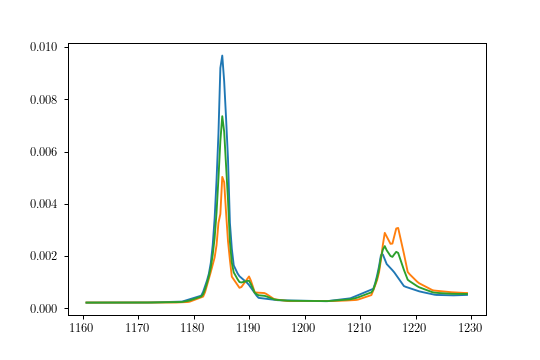

In [164]:
%matplotlib notebook
plt.plot(cont_ev_gd, gd_beta_par_interp)
#plt.scatter(ev_gd_beta_par, gd_beta_par)
plt.plot(cont_ev_gd, gd_beta_antipar_interp)
plt.plot(cont_ev_gd, gd_beta_avg_interp)

In [232]:
#Annahme: rzp_phi = -67 -> Gd M5 = 1185eV, rzp_phi = -87 -> 1215 eV
a = -3./2.
b = 2169./2.

#Annahme rzp phi -67 -> Gd M5 1184.79, rzp_phi - 87 -> 1215
#a = -1.65
#b = 1074.24
def rzp_phi_to_ev(rzp_phi):
    return a*rzp_phi + b

def ev_to_rzp_phi(ev):
    return (ev-b)/a

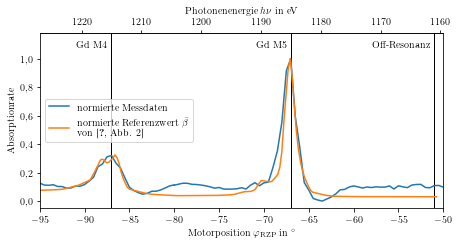

In [240]:
%matplotlib inline
fig = plt.figure(figsize=(6.48,3.5))
axis = fig.gca()
signal = smb_2/smb_1
signal_norm = signal-np.min(signal)

signal_norm = signal_norm/np.max(signal_norm)

args = np.argwhere(np.logical_and(rzp_phi > ev_to_rzp_phi(ev_gd_max), 1)) 

rzp_phi_short = rzp_phi[args]
signal_norm_short = signal_norm[args]

rzp_phi_measurements = [-67, -87, -51]
rzp_phi_labels = ['Gd M5', 'Gd M4', 'Off-Resonanz']

#rzp_phi_labels = ['Gd M5\n$h\\nu_\\text{Gd, M5}$', 'Gd M4\n$h\\nu_\\text{Gd, M4}$', 'Off-Resonanz\n$h\\nu_\\text{Off-Res}$']
axis.set_ylim(-0.05, 1.18)
axis.set_xlim(-95, -50)
for rzp_phi_meas, rzp_phi_label in zip(rzp_phi_measurements, rzp_phi_labels):
    axis.axvline(rzp_phi_meas, linestyle="-", color='black', linewidth=1, alpha=1)
    axis.text(rzp_phi_meas - 0.5, 1.08, rzp_phi_label, ha='right')

axis.plot(rzp_phi_short, signal_norm_short, label='normierte Messdaten')
axis.set_xlabel('Motorposition $\\varphi_{\\text{RZP}}$ in \\si{\\degree}')
axis.set_ylabel('Absorptionrate')

secax = axis.secondary_xaxis('top', functions=(rzp_phi_to_ev, ev_to_rzp_phi))
secax.set_xlabel('Photonenenergie $h\\nu$ in eV')
axis.plot(ev_to_rzp_phi(cont_ev_gd),gd_beta_avg_interp/np.max(gd_beta_avg_interp), label='normierte Referenzwert $\\bar{\\beta}$\nvon \\cite[Abb. 2]{prieto-x-ray-2005}')
#axis.plot(ev_to_rzp_phi(cont_ev_gd), gd_beta_par_interp/np.max(gd_beta_par_interp))
axis.yaxis.set_major_formatter(FuncFormatter(lambda x, pos: r"\num{%1.1f}" % x))
axis.legend(loc='center left')
fig.tight_layout()

In [241]:
fig.savefig(plots_output_path + 'rzp_phi_ev.pgf',bbox_inches='tight', pad_inches=0, dpi=500)